In [3]:
import ast
from IPython.display import display, SVG
from graphviz import Digraph

In [60]:
def show_tree(code: str, output_filename: str=None):
    """
    display abstract syntax tree in IPython
    using graphviz
    """
    
    def add_node(graph: Digraph, node: ast.AST, parent: ast.AST=None):
        """
        add single node (and its children recursively) to syntax tree
        """
        class_name = type(node).__name__

        name = None
        for attr in ['arg', 'name', 'id']:
            if hasattr(node, attr):
                name = getattr(node, attr).__str__()
            

        # get top-level class
        top_class = type(node)
        while hasattr(top_class, 'super'):
            top_class = top_class.super()

        graph.node(
            id(node).__str__(),
            class_name + (('\n' + name) if name is not None else ''),
        )

        if parent:
            graph.edge(id(parent).__str__(), id(node).__str__())
        for child in ast.iter_child_nodes(node):
            add_node(graph, child, node)

    graph = Digraph()
    add_node(graph, ast.parse(code))
    display(SVG(graph.pipe(format='svg')))

    if output_filename is not None:
        graph.render(output_filename, format='png')

In [61]:
code = \
'''
new_lambda = lambda x: x + 1
'''

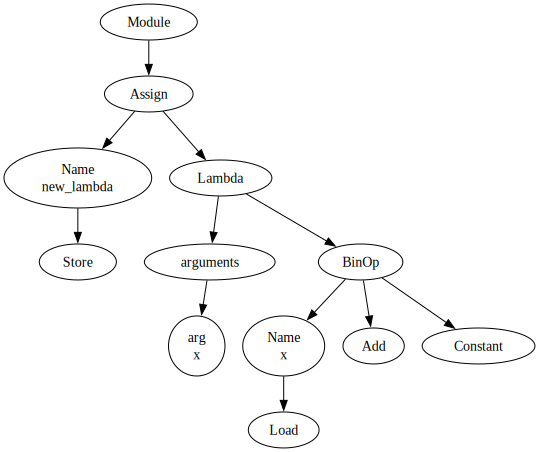

In [62]:
show_tree(code)

In [63]:
code = \
'''
class A(ast.AST):
    def __init__(self):
        pass
'''

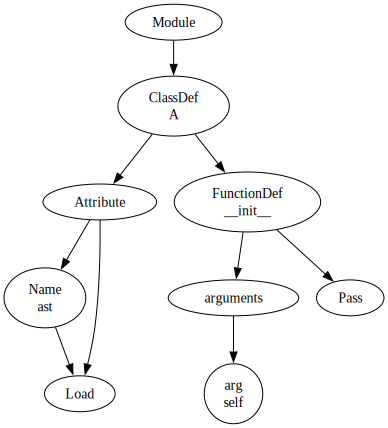

In [64]:
show_tree(code)

In [65]:
code = open('code_example.py').read()

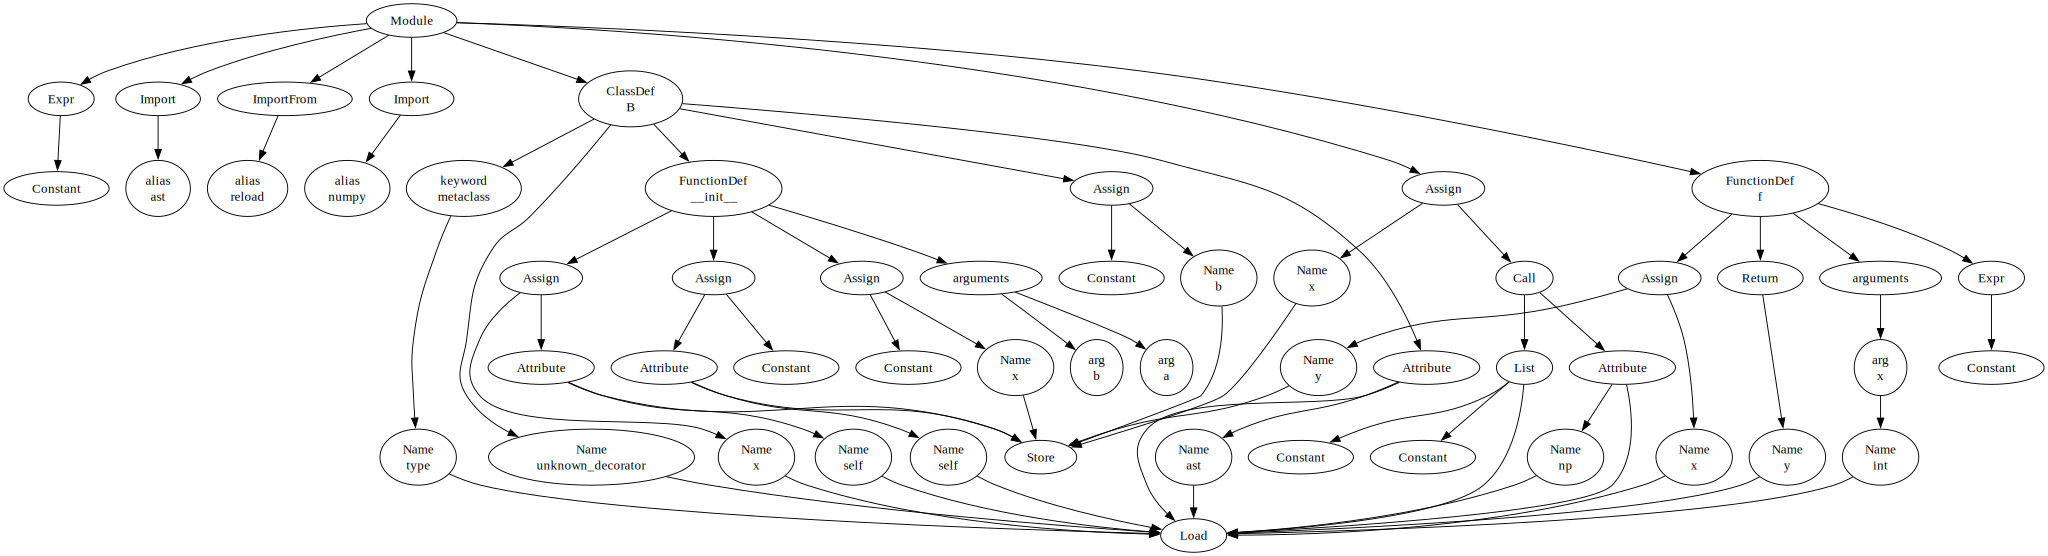

In [66]:
show_tree(code)

In [67]:
tree = ast.parse(code)

def rec(root):
    for node in ast.iter_child_nodes(root):
        print(type(node))
        print('\tfields:', node._fields)
        for field in node._fields:
            if hasattr(getattr(node, field), '__str__'):
                print('\t\t', field, ':', getattr(node, field).__str__().strip())
        rec(node)

rec(tree)

<class 'ast.Expr'>
	fields: ('value',)
		 value : <ast.Constant object at 0x73f45170bf10>
<class 'ast.Constant'>
	fields: ('value', 'kind')
		 value : module docstring
		 kind : None
<class 'ast.Import'>
	fields: ('names',)
		 names : [<ast.alias object at 0x73f45170be90>]
<class 'ast.alias'>
	fields: ('name', 'asname')
		 name : ast
		 asname : None
<class 'ast.ImportFrom'>
	fields: ('module', 'names', 'level')
		 module : importlib
		 names : [<ast.alias object at 0x73f45170be50>]
		 level : 0
<class 'ast.alias'>
	fields: ('name', 'asname')
		 name : reload
		 asname : None
<class 'ast.Import'>
	fields: ('names',)
		 names : [<ast.alias object at 0x73f45170bdd0>]
<class 'ast.alias'>
	fields: ('name', 'asname')
		 name : numpy
		 asname : np
<class 'ast.Assign'>
	fields: ('targets', 'value', 'type_comment')
		 targets : [<ast.Name object at 0x73f45170bd50>]
		 value : <ast.Call object at 0x73f45170bcd0>
		 type_comment : None
<class 'ast.Name'>
	fields: ('id', 'ctx')
		 id : x
		 ctx 